In [2]:
#Importing Libraries & Data Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
#reading the churn data
data = pd.read_csv('/content/churndata.csv')

In [4]:
# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

## DataPreprocessing

In [5]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [6]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [7]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [8]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [9]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Train Random Forest Model

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=22)


In [12]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

## Evaluate Model

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [14]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[800  66]
 [106 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       866
           1       0.78      0.68      0.73       336

    accuracy                           0.86      1202
   macro avg       0.83      0.80      0.82      1202
weighted avg       0.85      0.86      0.85      1202



In [15]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

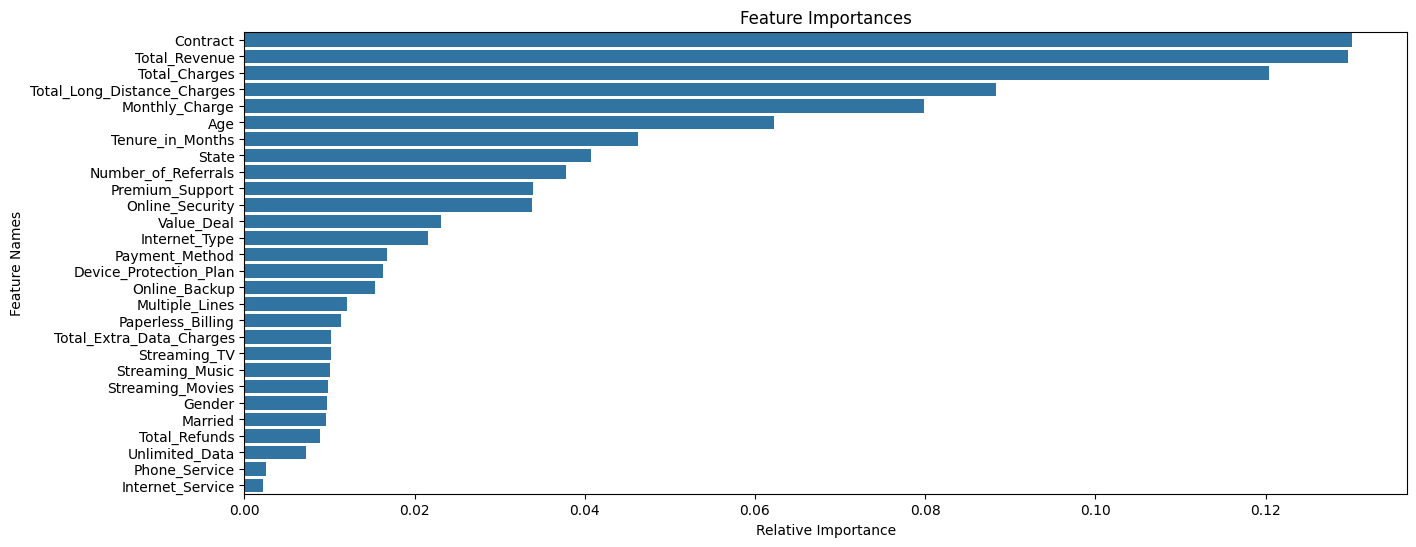

In [16]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

## Use Model for Prediction on New Data

In [19]:
# Newdata
new_data = pd.read_csv('/content/newdata.csv')

In [21]:
# Display the first few rows of the fetched data
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN


In [22]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

In [23]:
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

In [24]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [25]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

In [26]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [27]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [29]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [30]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [32]:
# Save the results
original_data.to_csv(r"/content/Predictions.csv", index=False)